# Visualizing Titanic Data

![titanic picture from wikipedia](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/600px-RMS_Titanic_3.jpg)

In [1]:
# first, need our imports and to grab the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# what's in the data?
!ls data

Austin_Animal_Center_Intakes_10-08-20.csv
Austin_Animal_Center_Outcomes_10-14-20.csv
flights.db
titanic.csv


In [3]:
df = pd.read_csv('data/titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### What are the most common last names?

Wait, the last names are part of the full name column... first we'll need to grab the last names!

A few ways we can do this:

In [6]:
# Need to grab last names ... but how
# Method 1
df['Name'].map(lambda x: x.split(sep=',')[0])

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object

In [7]:
# Method 2
ln_list = []
for row in df.index:
    last_name = df['Name'].str.split(',')[row][0]
    ln_list.append(last_name)
print(ln_list[:5])

['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen']


In [8]:
# Method 3 
df['Name'].str.split(',').head()

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                            [Heikkinen,  Miss. Laina]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
Name: Name, dtype: object

In [9]:
[ln_name[0] for ln_name in df['Name'].str.split(',')]

['Braund',
 'Cumings',
 'Heikkinen',
 'Futrelle',
 'Allen',
 'Moran',
 'McCarthy',
 'Palsson',
 'Johnson',
 'Nasser',
 'Sandstrom',
 'Bonnell',
 'Saundercock',
 'Andersson',
 'Vestrom',
 'Hewlett',
 'Rice',
 'Williams',
 'Vander Planke',
 'Masselmani',
 'Fynney',
 'Beesley',
 'McGowan',
 'Sloper',
 'Palsson',
 'Asplund',
 'Emir',
 'Fortune',
 "O'Dwyer",
 'Todoroff',
 'Uruchurtu',
 'Spencer',
 'Glynn',
 'Wheadon',
 'Meyer',
 'Holverson',
 'Mamee',
 'Cann',
 'Vander Planke',
 'Nicola-Yarred',
 'Ahlin',
 'Turpin',
 'Kraeff',
 'Laroche',
 'Devaney',
 'Rogers',
 'Lennon',
 "O'Driscoll",
 'Samaan',
 'Arnold-Franchi',
 'Panula',
 'Nosworthy',
 'Harper',
 'Faunthorpe',
 'Ostby',
 'Woolner',
 'Rugg',
 'Novel',
 'West',
 'Goodwin',
 'Sirayanian',
 'Icard',
 'Harris',
 'Skoog',
 'Stewart',
 'Moubarek',
 'Nye',
 'Crease',
 'Andersson',
 'Kink',
 'Jenkin',
 'Goodwin',
 'Hood',
 'Chronopoulos',
 'Bing',
 'Moen',
 'Staneff',
 'Moutal',
 'Caldwell',
 'Dowdell',
 'Waelens',
 'Sheerlinck',
 'McDermott',

In [10]:
# Method 4
df['Last Name'] = pd.Series(name[0] for name in df['Name'].str.split(','))
df['Last Name'].head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Last Name, dtype: object

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


`groupby` or `value_counts`?

In [12]:
# Method 1
df['Last Name'].value_counts().head()

Andersson    9
Sage         7
Skoog        6
Carter       6
Panula       6
Name: Last Name, dtype: int64

In [13]:
# Method 2
most_common_lns = df.groupby(df['Last Name']).count()[['PassengerId']].rename(columns={"PassengerId":"Count"}).sort_values(by='Count', ascending =False).head(8)

In [14]:
most_common_lns.head()

,Count
Last Name,
Andersson,9
Sage,7
Skoog,6
Carter,6
Goodwin,6


Now let's visualize:

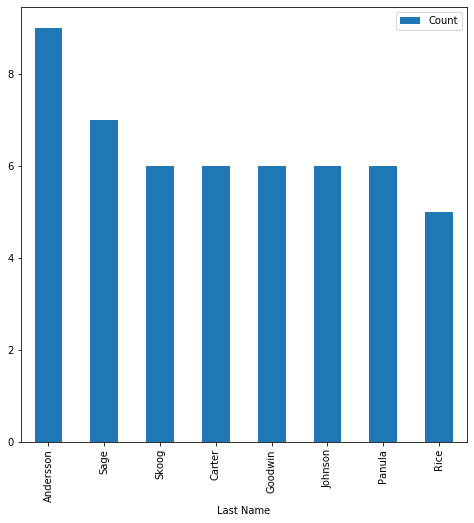

In [15]:
# Plot a bar graph of the most common last names
# Method 1
most_common_lns.plot(kind='bar',figsize=(8,8))
plt.show()

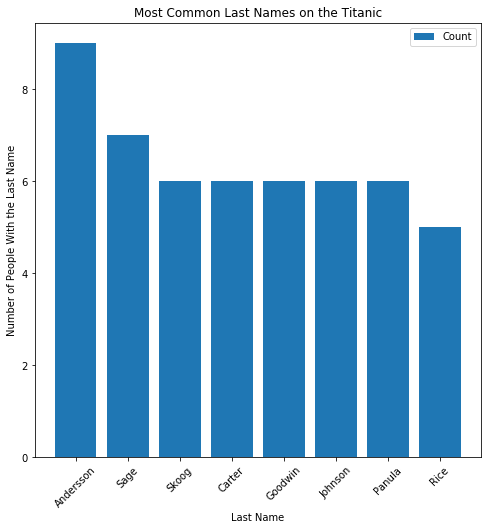

In [16]:
# Method 2
plt.figure(figsize=(8,8))
plt.bar(x=most_common_lns.index, height=most_common_lns['Count'], label='Count')
plt.title('Most Common Last Names on the Titanic')
plt.ylabel('Number of People With the Last Name')
plt.xlabel('Last Name')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Who Paid the Most Fare?

As always - a few ways we can do this: `.loc` versus `sort_values`

In [17]:
df['Fare'].max()

512.3292

In [18]:
df.loc[df['Fare'] >= df['Fare'].mean()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,Sloper
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Fortune
...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,Wick
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Sage
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,Roebling
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Beckwith


And let's visualize some more!

In [19]:
# Plot a histogram - but now, let's do all fares
df['Fare'].sort_values(ascending=False).head()

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
Name: Fare, dtype: float64

In [20]:
df.sort_values(by='Fare', ascending = False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Ward
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Lesurer
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Cardeza
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Fortune
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Fortune


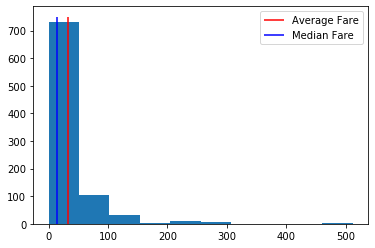

In [21]:
# Okay that's pretty bland, let's see if we can add more detail
plt.hist(df['Fare'])
plt.vlines(x=df['Fare'].mean(), ymin=0, ymax=750, color = 'r', label='Average Fare')
plt.vlines(x=df['Fare'].median(), ymin=0, ymax=750, color = 'b', label='Median Fare')
plt.legend()
plt.show()

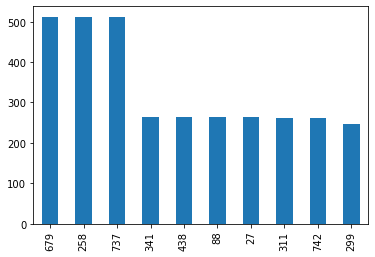

In [22]:
df['Fare'].sort_values(ascending=False).head(10).plot(kind='bar')

In [23]:
most_fare = df.sort_values(by='Fare',ascending=False).head(10)

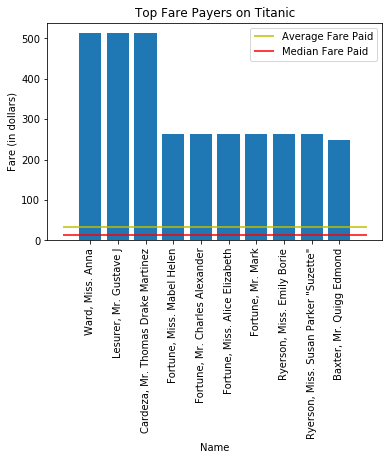

In [24]:
plt.bar(x=most_fare['Name'], height=most_fare['Fare'])
plt.hlines(y=df['Fare'].mean(), xmin=-1, xmax=10, label = "Average Fare Paid", color ='y')
plt.hlines(y=df['Fare'].median(), xmin=-1, xmax=10, label = "Median Fare Paid", color='r')
plt.legend()
plt.xticks(rotation='vertical')
plt.xlabel('Name')
plt.ylabel('Fare (in dollars)')
plt.title('Top Fare Payers on Titanic')
plt.show()

## Seaborn 

![Sam Seaborn from West Wing, image from the TV guide](https://tvguide1.cbsistatic.com/i/2017/01/07/0f1a6ab5-8c63-4869-9f85-5d8b2b14913b/cf2e9396152ee85468e5bcfe063053a4/010717-west-wing-rob-lowe-news.jpg)

[Seaborn, I choose you!](https://elitedatascience.com/python-seaborn-tutorial) (aka an excellent exploration of the functionality of Seaborn)

Now let's practice with Seaborn:

In [25]:
import seaborn as sns
sns.set(style='darkgrid')
# Same as sns.set_style('darkgrid')

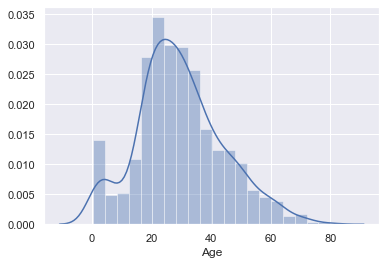

In [26]:
sns.distplot(df['Age'].dropna())

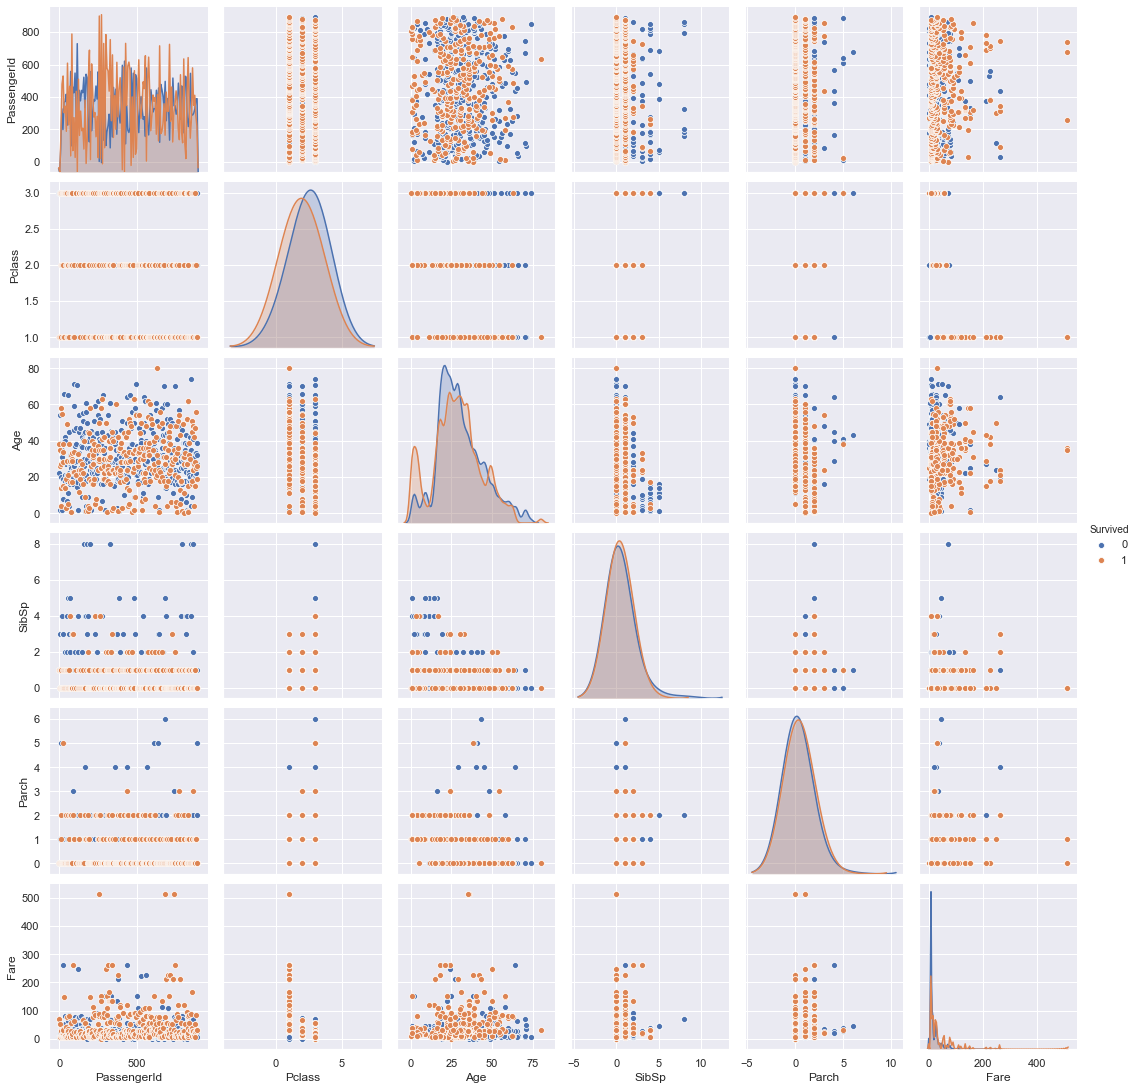

In [31]:
# We've mentioned pairplots, let's take a look...
sns.pairplot(df, hue='Survived',diag_kws={'bw': 1.5})

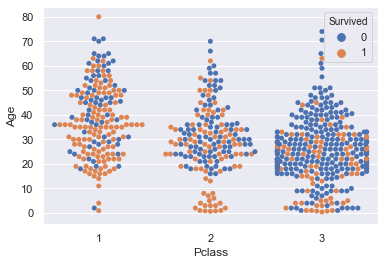

In [28]:
# Try out a swarm plot with class and age
sns.swarmplot('Pclass', 'Age', data=df, hue='Survived')

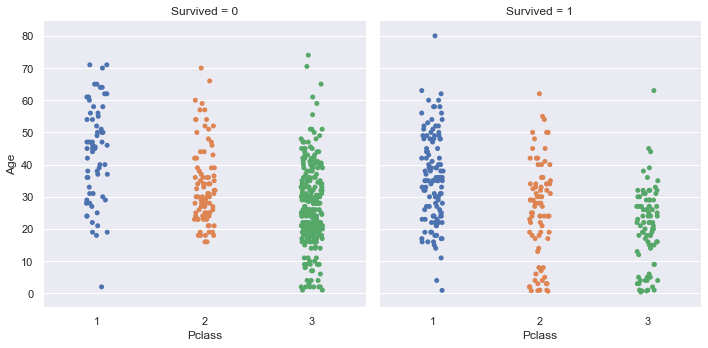

In [29]:
# Let's try a categorical plot (used to be a factor plot)
# Do the same swarmplot, but now make columns of survived
sns.catplot('Pclass', 'Age', data=df, col='Survived')